In [1]:
import math
import random
import matplotlib.pyplot as plt
from itertools import chain

%matplotlib inline

In [2]:
class Dot(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __add__(self, other):
        return Dot(self.x + other.x, self.y + other.y)
        
    def __mul__(self, num):
        return Dot(self.x * num, self.y * num)
    
    def __rmul__(self, num):
        return self * num
        
    def __sub__(self, other):
        return self + other * (-1)
    
    def __truediv__(self, num):
        return self * (1 / num)
    
    def scalar_dot(self, other):
        return self.x * other.x + self.y * other.y
    
    def vector_dot(self, other):
        return self.x * other.y - self.y * other.x
        
    def __repr__(self):
        return str((self.x, self.y))

In [6]:
def get_regular_polygon(n):
    alpha = 2.0 * math.pi / n
    current_dot = Dot(1, 0)
    
    polygon = []
    for _ in range(n):
        polygon.append(current_dot)
        current_dot = Dot(
            current_dot.x * math.cos(alpha) - current_dot.y * math.sin(alpha),
            current_dot.x * math.sin(alpha) + current_dot.y * math.cos(alpha)
        )
    
    return polygon

In [4]:
def zip_dots(dots):
    x = [d.x for d in dots]
    y = [d.y for d in dots]
    return x, y


def draw_lines(dots):    
    plt.plot(*zip_dots(dots))


def draw_points(dots):
    plt.plot(*zip_dots(dots), 'bo', markersize=0.5)

In [5]:
def draw_fractal(polygon, magic_number=2, num_iter=100000):
    plt.figure(figsize=(10, 10))
    starting_dot = Dot(0, 0)
    
    # Draw polygon borders
    draw_lines(polygon + [polygon[0]])

    dots = []
    current_dot = starting_dot
    for _ in range(num_iter):
        dots.append(current_dot)
        random_vertex = random.choice(polygon)
        current_dot = (current_dot + random_vertex) / magic_number

    draw_points(dots)

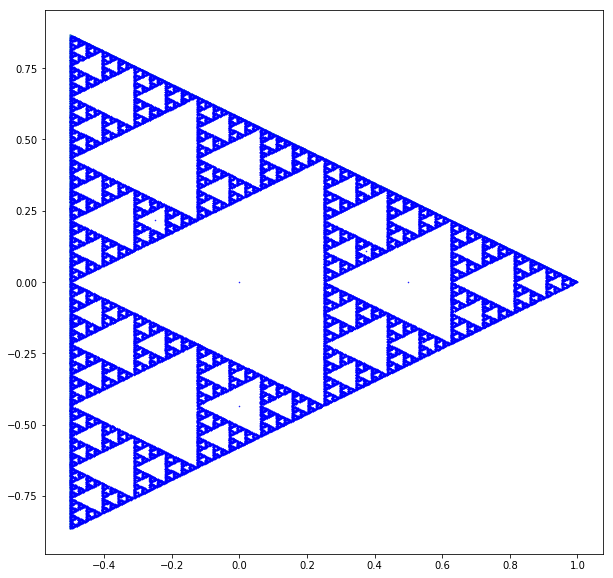

In [7]:
draw_fractal(get_right_polygon(3))

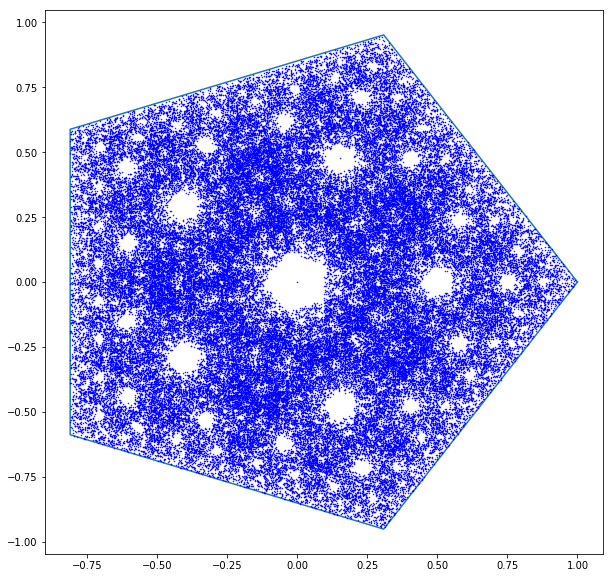

In [8]:
draw_fractal(get_right_polygon(5))

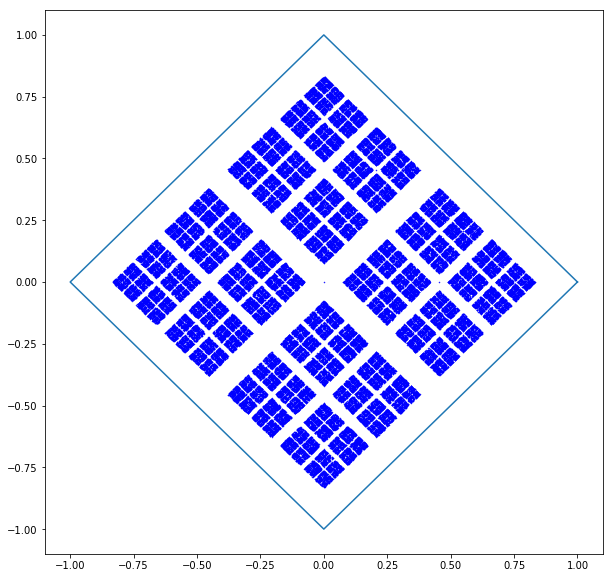

In [13]:
draw_fractal(get_right_polygon(4), 2.2)

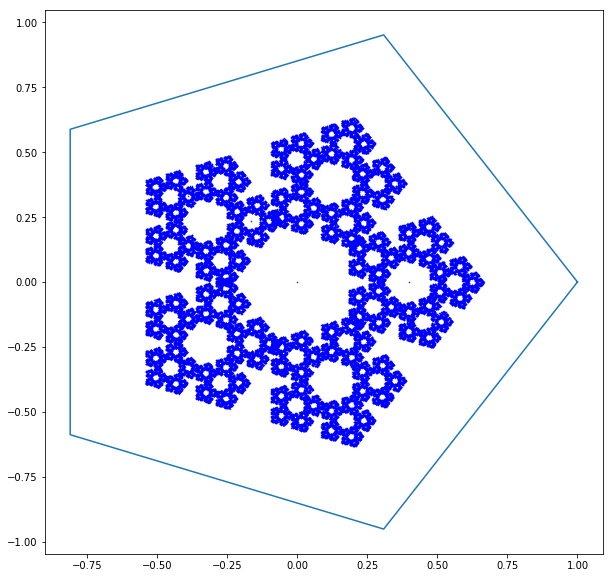

In [14]:
draw_fractal(get_right_polygon(5), 2.5)

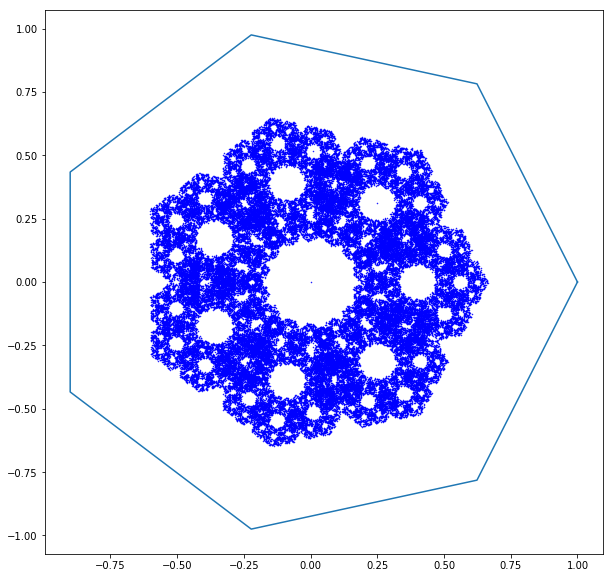

In [15]:
draw_fractal(get_right_polygon(7), 2.5)

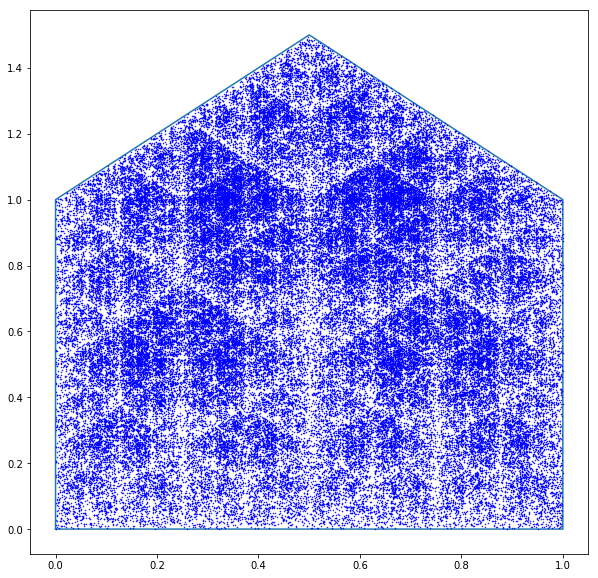

In [16]:
draw_fractal([Dot(0, 0), Dot(1, 0), Dot(1, 1), Dot(0.5, 1.5), Dot(0, 1)])